## Boosting & Stacking Assignment

### **Theoretical Section**

1. **What is Boosting in Machine Learning?**
   
   Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to form a strong learner. It builds models sequentially, where each new model focuses on correcting the errors of the previous ones.

2. **How does Boosting differ from Bagging?**

   * **Bagging** trains models independently in parallel and combines results (like Random Forest).
   * **Boosting** trains models sequentially, with each model learning from the errors of the previous one.
     Boosting often results in better performance but is more prone to overfitting.

3. **What is the key idea behind AdaBoost?**
   
   AdaBoost (Adaptive Boosting) assigns weights to training samples. Misclassified samples get higher weights so the next model focuses more on them. Final prediction is a weighted vote of all weak learners.

4. **Explain the working of AdaBoost with an example.**
   
   Suppose we start with equal weights for all samples. A weak classifier (e.g., decision stump) is trained and samples it misclassifies have their weights increased. The next model focuses more on these. This process repeats, and the final prediction is based on a weighted sum of all models’ outputs.

5. **What is Gradient Boosting, and how is it different from AdaBoost?**
   
   Gradient Boosting minimizes a loss function using gradient descent. Unlike AdaBoost which adjusts sample weights, Gradient Boosting fits the new model to the **residual errors** (gradients) of the previous one. It's more flexible and allows optimization of different loss functions.

6. **What is the loss function in Gradient Boosting?**
   
   The loss function depends on the problem:

   * For regression: Mean Squared Error (MSE)
   * For classification: Log-loss or exponential loss
     It measures the difference between predicted and actual values and is minimized during training.

7. **How does XGBoost improve over traditional Gradient Boosting?**
   
   XGBoost introduces:

   * Regularization to prevent overfitting
   * Parallel processing
   * Tree pruning
   * Handling of missing values
   * Efficient memory usage
     These make it faster and more accurate than traditional Gradient Boosting.

8. **What is the difference between XGBoost and CatBoost?**

   * **XGBoost** is optimized for speed and performance.
   * **CatBoost** is specifically optimized for categorical data and reduces preprocessing. It also handles overfitting better with ordered boosting and provides excellent default settings.

9. **What are some real-world applications of Boosting techniques?**

   * Fraud detection
   * Credit scoring
   * Spam filtering
   * Image recognition
   * Medical diagnosis
   * Recommendation systems

10. **How does regularization help in XGBoost?**
   
   Regularization in XGBoost penalizes complex models (many trees or deep trees), reducing overfitting. It uses both L1 and L2 regularization to control model complexity.

11. **What are some hyperparameters to tune in Gradient Boosting models?**

    * `n_estimators`: Number of trees
    * `learning_rate`: Shrinks contribution of each tree
    * `max_depth`: Tree depth
    * `min_samples_split`, `min_samples_leaf`: Control overfitting
    * `subsample`: Fraction of samples used per tree
    * `loss`: Type of loss function

12. **What is the concept of Feature Importance in Boosting?**
   
   Feature importance scores indicate how much each feature contributed to model performance. Boosting models compute this by how often a feature is used to split the data and how much it improves purity.

13. **Why is CatBoost efficient for categorical data?**
   
   CatBoost handles categorical variables internally without the need for one-hot encoding. It uses **ordered target statistics** to prevent target leakage and improves performance with minimal preprocessing.


### Practical Section

In [3]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use `estimator` instead of deprecated `base_estimator`
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 1.0


In [4]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = AdaBoostRegressor(n_estimators=50, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 8.857195885222445


In [5]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0000
mean texture: 0.0184
mean perimeter: 0.0004
mean area: 0.0003
mean smoothness: 0.0009
mean compactness: 0.0017
mean concavity: 0.0012
mean concave points: 0.4349
mean symmetry: 0.0002
mean fractal dimension: 0.0007
radius error: 0.0100
texture error: 0.0013
perimeter error: 0.0020
area error: 0.0055
smoothness error: 0.0004
compactness error: 0.0044
concavity error: 0.0156
concave points error: 0.0034
symmetry error: 0.0018
fractal dimension error: 0.0006
worst radius: 0.0454
worst texture: 0.0472
worst perimeter: 0.0510
worst area: 0.0480
worst smoothness: 0.0045
worst compactness: 0.0010
worst concavity: 0.0230
worst concave points: 0.2738
worst symmetry: 0.0013
worst fractal dimension: 0.0011


In [6]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.8658323075853522


In [8]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 0.9707602339181286


In [13]:
#19. Train a CatBoost Classifier and evaluate using F1-Score

!pip install catboost



In [12]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred))  # For binary classification

F1 Score: 0.981651376146789


In [14]:
# 20.	Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

!pip install xgboost


In [15]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a regression dataset
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train XGBoost Regressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1032.1613735441435


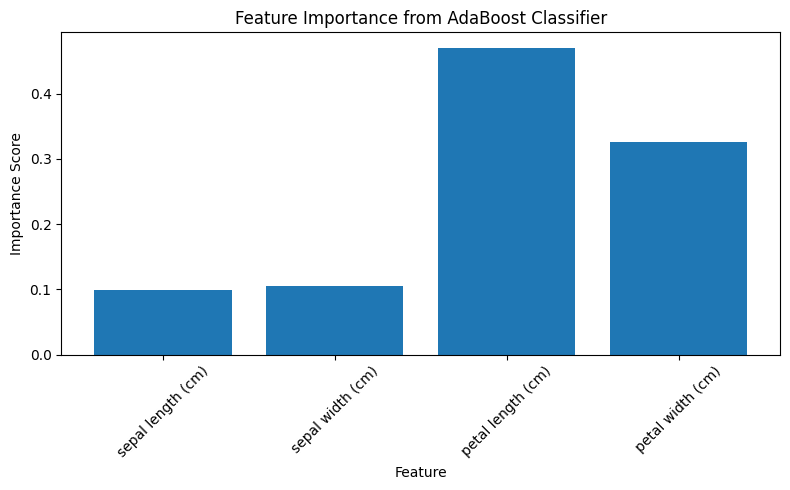

In [16]:
# 21.	Train an AdaBoost Classifier and visualize feature importance.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost classifier
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances, tick_label=feature_names)
plt.title('Feature Importance from AdaBoost Classifier')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


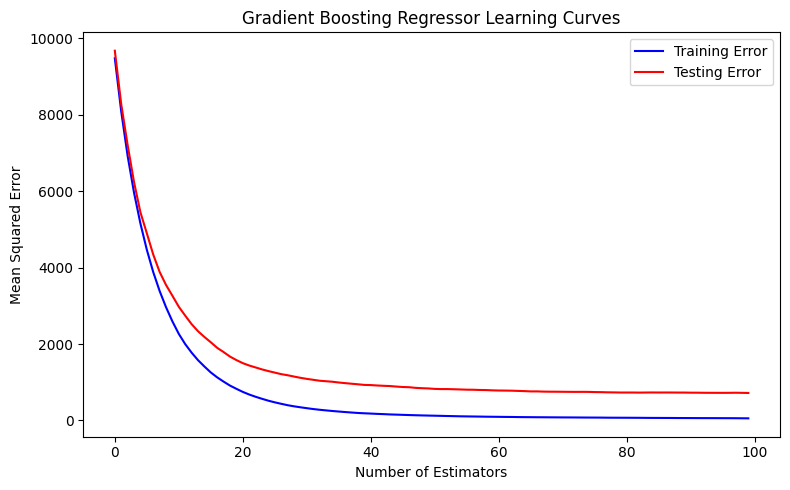

In [18]:
# 22.	Train a Gradient Boosting Regressor and plot learning curves.

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate dataset
X, y = make_regression(n_samples=300, n_features=5, noise=15, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model first
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Now calculate staged errors
train_errors = []
test_errors = []

for y_pred_train, y_pred_test in zip(
    gbr.staged_predict(X_train),
    gbr.staged_predict(X_test)
):
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))

# Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training Error', color='blue')
plt.plot(test_errors, label='Testing Error', color='red')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor Learning Curves')
plt.legend()
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

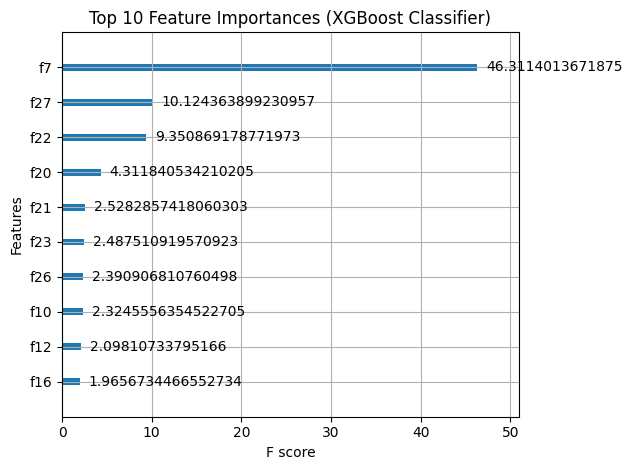

In [19]:
# 23.	Train an XGBoost Classifier and visualize feature importance.

import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title('Top 10 Feature Importances (XGBoost Classifier)')
plt.tight_layout()
plt.show()


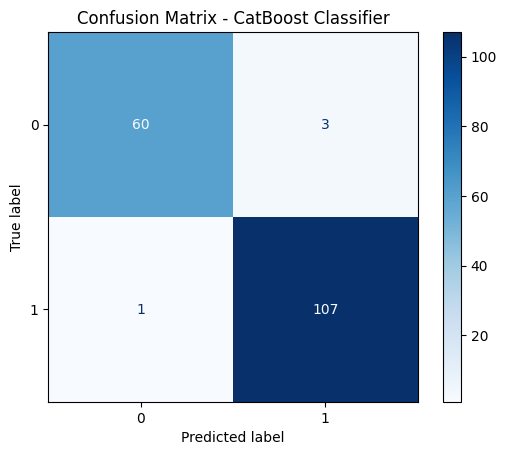

In [20]:
# 24.	Train a CatBoost Classifier and plot the confusion matrix.

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


n_estimators = 10 -> Accuracy = 1.0000
n_estimators = 50 -> Accuracy = 1.0000
n_estimators = 100 -> Accuracy = 1.0000
n_estimators = 150 -> Accuracy = 1.0000
n_estimators = 200 -> Accuracy = 1.0000


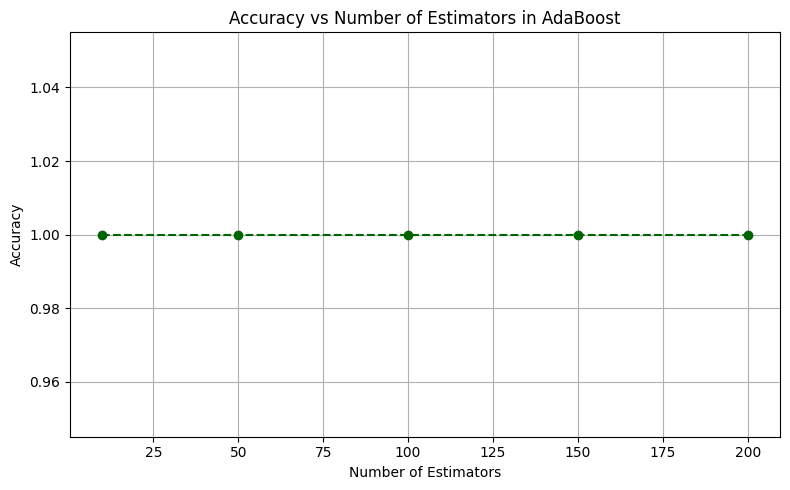

In [21]:
# 25.	Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different numbers of estimators
estimator_range = [10, 50, 100, 150, 200]
accuracies = []

for n in estimator_range:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n} -> Accuracy = {acc:.4f}")

# Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 5))
plt.plot(estimator_range, accuracies, marker='o', linestyle='--', color='darkgreen')
plt.title('Accuracy vs Number of Estimators in AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


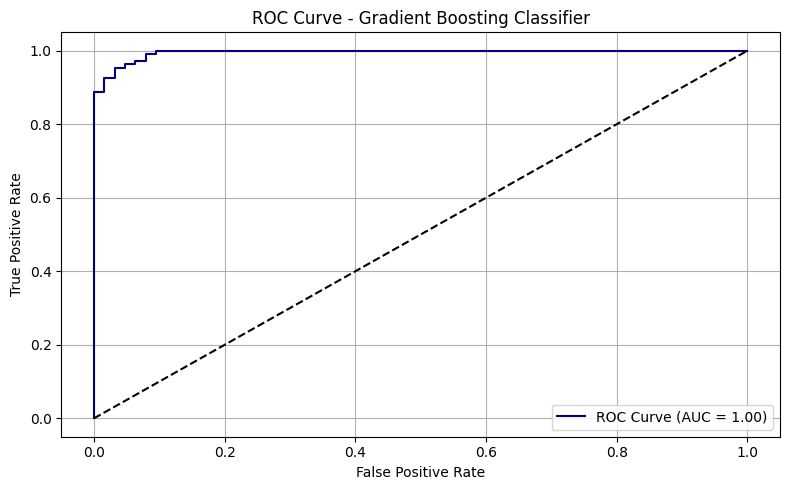

In [22]:
# 26.	Train a Gradient Boosting Classifier and visualize the ROC curve.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load binary classification dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='navy')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# 27.	Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create synthetic regression data
X, y = make_regression(n_samples=300, n_features=5, noise=15, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
model = XGBRegressor(random_state=42)

# Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Best CV MSE (negative):", grid_search.best_score_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE with Best Learning Rate:", test_mse)


Best Learning Rate: 0.2
Best CV MSE (negative): -994.2139644895769
Test MSE with Best Learning Rate: 1143.8231613872476


In [24]:
# 28.	Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Create imbalanced binary classification data
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], flip_y=0, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------ Model without class weights ------
model_default = CatBoostClassifier(verbose=0, random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

print("⚖️ Without Class Weights")
print(classification_report(y_test, y_pred_default))

# ------ Model with class weights ------
# Calculate class weights manually
unique_classes = np.unique(y_train)
class_counts = np.bincount(y_train)
class_weights = {i: max(class_counts)/c for i, c in enumerate(class_counts)}

model_weighted = CatBoostClassifier(class_weights=class_weights, verbose=0, random_state=42)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("\n⚖️ With Class Weights")
print(classification_report(y_test, y_pred_weighted))


⚖️ Without Class Weights
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       267
           1       0.92      0.70      0.79        33

    accuracy                           0.96       300
   macro avg       0.94      0.84      0.89       300
weighted avg       0.96      0.96      0.96       300


⚖️ With Class Weights
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       267
           1       0.86      0.76      0.81        33

    accuracy                           0.96       300
   macro avg       0.92      0.87      0.89       300
weighted avg       0.96      0.96      0.96       300



Learning Rate = 0.01 -> Accuracy = 0.9778
Learning Rate = 0.05 -> Accuracy = 1.0000
Learning Rate = 0.1 -> Accuracy = 1.0000
Learning Rate = 0.5 -> Accuracy = 1.0000
Learning Rate = 1.0 -> Accuracy = 1.0000


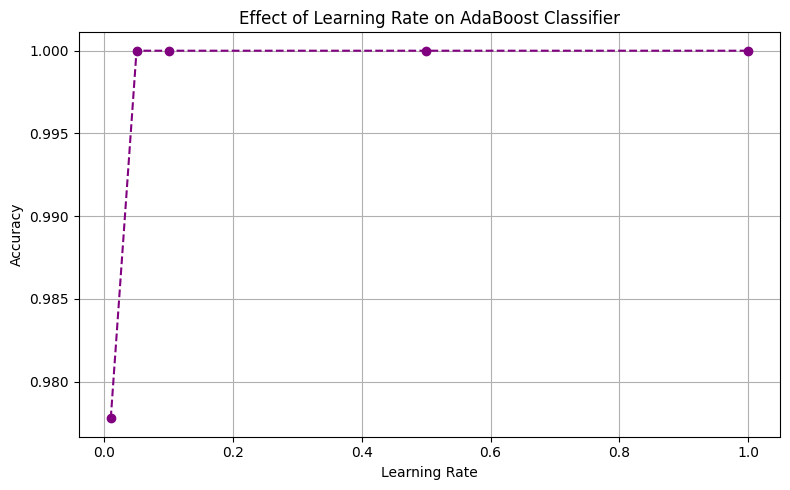

In [25]:
# 29.	Train an AdaBoost Classifier and analyze the effect of different learning rates.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
accuracies = []

# Train AdaBoost with different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                               n_estimators=50,
                               learning_rate=lr,
                               random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate = {lr} -> Accuracy = {acc:.4f}")

# Plot Learning Rate vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='--', color='purple')
plt.title('Effect of Learning Rate on AdaBoost Classifier')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# 30.	Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load multi-class dataset (Iris has 3 classes)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier for multi-class
model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Predict class probabilities for log-loss
y_proba = model.predict_proba(X_test)

# Calculate log-loss
loss = log_loss(y_test, y_proba)
print("Log-Loss on Multi-class XGBoost Classifier:", loss)


Log-Loss on Multi-class XGBoost Classifier: 0.009982810029811636
